####  2013년 ~ 2016년 까지 오스틴 동물 센터의 데이터로 동물이 동물 센터를 떠날때, 동물의 결과를 예측 
##### 평가산식 : Logloss

#### 데이터 변수 설명

In [25]:
# AnimalID : 동물 ID
# Name : 이름
# DateTime : 날짜
# OutcomeType : 결과 유형
# OutcomeSubtype : 결과 하위 유형
# AnimalType : 동물 유형
# SexuponOutcome : 중성화 여부에 따른 성별 (Neutered Male, Spayed Female) == 중성화, (Intact Male, Intact Female) == 중성화X
# AgeuponOutcome : 나이
# Breed : 종
# Color : 색깔

#### 예측해야 할 칼럼 : OutcomeType

In [26]:
# 다중분류 대회

In [27]:
import pandas as pd
import numpy as np

In [28]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
display(train,test)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
...,...,...,...,...,...,...,...,...
11451,11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan


In [29]:
all_data = pd.concat([train,test])

#### "AgeuponOutcome"의 Dtype은 object 이지만 숫자적 느낌이다.
NaN값 처리하고, 정수형으로 바꿔주는 함수를 만들어 적용한다.

In [30]:
all_data["AgeuponOutcome"].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years', '22 years'],
      dtype=object)

In [31]:
def age(x):
    if pd.isnull(x):
        return -1
    num = int(x.split(' ')[0])
    if 'year' in x:
        return num * 365
    elif 'month' in x:
        return num * 30
    elif 'week' in x:
        return num * 7
    else:
        return num * 1

In [32]:
all_data["AgeuponOutcome"] = all_data["AgeuponOutcome"].apply(age)

In [33]:
all_data["DateTime"] = all_data["DateTime"].astype("datetime64")
all_data["year"] = all_data["DateTime"].dt.year
all_data["month"] = all_data["DateTime"].dt.month
all_data["day"] = all_data["DateTime"].dt.day
all_data["hour"] = all_data["DateTime"].dt.hour
all_data["minute"] = all_data["DateTime"].dt.minute
all_data["weekday"] = all_data["DateTime"].dt.weekday
all_data["week"] = all_data["DateTime"].dt.week 
all_data["time"] = all_data["DateTime"].dt.date - all_data["DateTime"].dt.date.min() # 시간의 흐름
all_data["time"] = all_data["time"].apply(lambda x:x.days)

In [34]:
all_data.isnull().sum()

AnimalID          11456
Name              10916
DateTime              0
OutcomeType       11456
OutcomeSubtype    25068
AnimalType            0
SexuponOutcome        1
AgeuponOutcome        0
Breed                 0
Color                 0
ID                26729
year                  0
month                 0
day                   0
hour                  0
minute                0
weekday               0
week                  0
time                  0
dtype: int64

In [35]:
all_data["Name"] = all_data["Name"].notnull()

#### 시각화

<AxesSubplot:xlabel='hour', ylabel='count'>

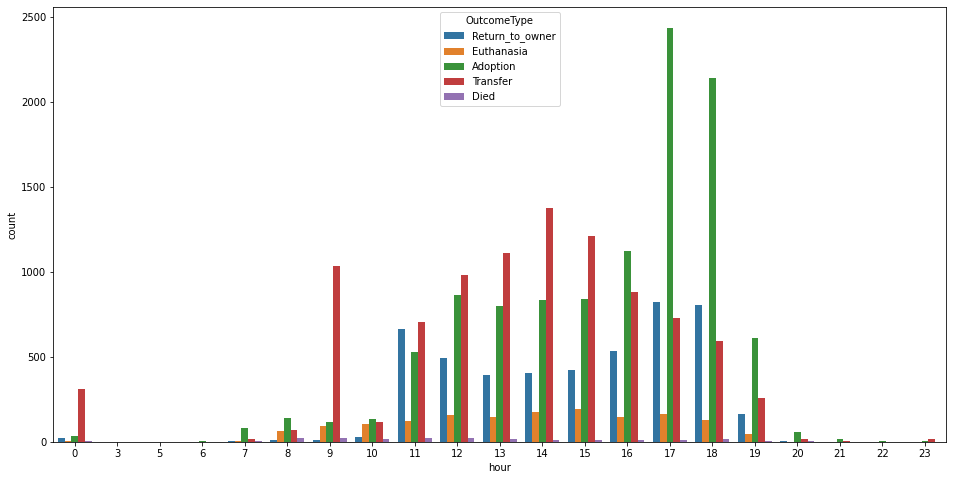

In [36]:
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(all_data["hour"],hue=all_data["OutcomeType"])

<AxesSubplot:xlabel='year', ylabel='count'>

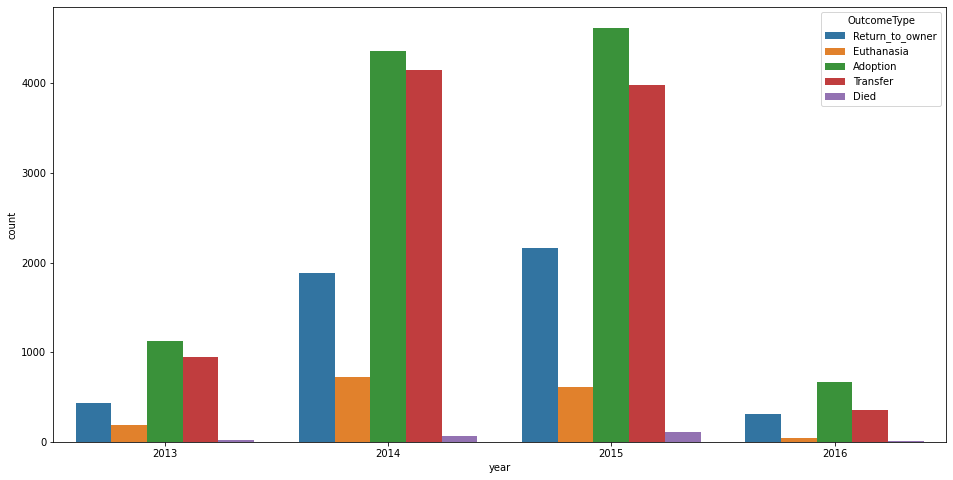

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(all_data["year"],hue=all_data["OutcomeType"])

In [38]:
# 정답값과 불필요한 칼럼 삭제
all_data2 = all_data.drop(columns=["AnimalID","ID","DateTime","OutcomeType","OutcomeSubtype"])

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in all_data2.columns[all_data2.dtypes == "object"]:
    all_data2[i] = le.fit_transform(list(all_data2[i]))

In [40]:
train2 = all_data2[:len(train)]
test2 = all_data2[len(train):]

In [41]:
best_score = 0
result = 0
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 82)
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=50)
for train_index, valid_index in skf.split(train2,train["OutcomeType"]):
    X_train,X_valid = train2.iloc[train_index], train2.iloc[valid_index]
    y_train,y_valid = train["OutcomeType"].iloc[train_index], train["OutcomeType"].iloc[valid_index]
    cbc.fit(X_train,y_train,eval_set=(X_valid,y_valid),early_stopping_rounds=50,verbose=0,cat_features = np.where(train2.dtypes != "float")[0])
    result += cbc.predict_proba(test2)/5
    best_score += cbc.best_score_["validation"]["MultiClass"] / 5

In [42]:
result

array([[1.51640188e-02, 1.69993863e-03, 1.79497555e-02, 8.39544889e-02,
        8.81231798e-01],
       [8.06641215e-01, 4.69944340e-04, 6.13606923e-03, 1.44156492e-01,
        4.25962787e-02],
       [5.27871263e-01, 1.87878990e-03, 1.25180686e-02, 1.62993789e-01,
        2.94738090e-01],
       ...,
       [3.72680330e-04, 1.08241677e-03, 2.26888131e-03, 4.94346788e-04,
        9.95781675e-01],
       [4.84015506e-01, 1.55904189e-03, 2.24323921e-02, 3.92522168e-01,
        9.94708917e-02],
       [7.09709590e-02, 1.84650535e-03, 1.42129811e-01, 6.35240075e-01,
        1.49812650e-01]])

In [43]:
sub = pd.read_csv("sample_submission.csv")

In [44]:
sub.iloc[:,1:] = result
sub

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.015164,0.001700,0.017950,0.083954,0.881232
1,2,0.806641,0.000470,0.006136,0.144156,0.042596
2,3,0.527871,0.001879,0.012518,0.162994,0.294738
3,4,0.226404,0.007858,0.028956,0.262267,0.474514
4,5,0.454795,0.000585,0.016470,0.475508,0.052641
...,...,...,...,...,...,...
11451,11452,0.173150,0.000571,0.003060,0.002716,0.820503
11452,11453,0.000209,0.002428,0.007513,0.000715,0.989136
11453,11454,0.000373,0.001082,0.002269,0.000494,0.995782
11454,11455,0.484016,0.001559,0.022432,0.392522,0.099471


In [49]:
sub.to_csv("sub_shelter.csv",index = False)

#### feature의 중요도 판단하기

In [46]:
cbc.feature_importances_

array([ 4.26123159,  2.88893553, 14.68495477, 15.26349378,  9.52067874,
        5.77695796,  4.40209523,  4.35539494,  4.28870252, 12.77288635,
        5.87047772,  4.53902865,  4.50693642,  6.8682258 ])

In [47]:
importance = pd.Series(cbc.feature_importances_,index=train2.columns).sort_values(ascending=False)

<AxesSubplot:>

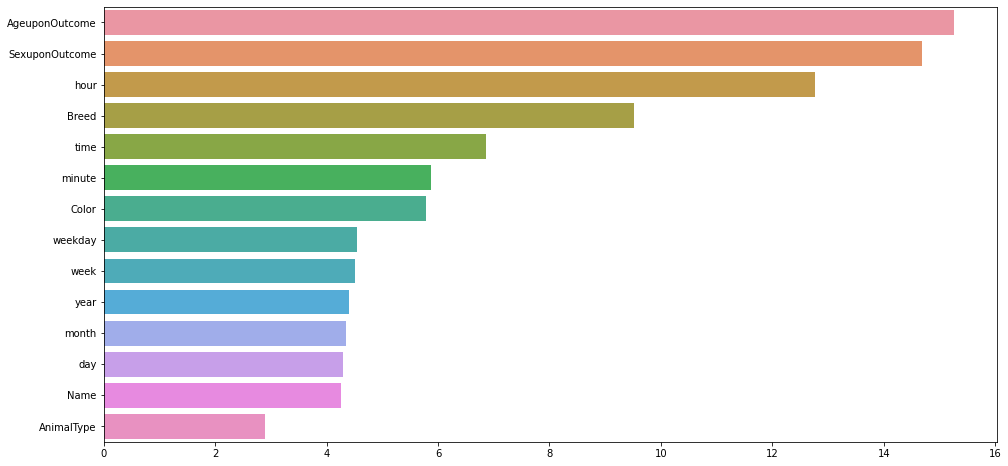

In [48]:
plt.figure(figsize=(16,8))
sns.barplot(importance.values,importance.index)

#### Private Score : 0.67710